In [4]:
from collections import defaultdict, deque
import random
import math
import time
import random
import numpy as np
import pandas as pd

class City:
    id = 0
    def __init__(self):
        self.X = random.randint(-100, 100)
        self.Y = random.randint(-100, 100)
        self.Z = random.randint(0, 50)
        self.coordinates = np.array((self.X, self.Y, self.Z))
        self.id = City.id
        City.id += 1
    
class Graph:
    
    def __init__(self, cities):
        self.all_paths = []
        self.distance_list = []
        self.adjList = defaultdict(list)
        self.sym_matrix = self.generate_sym_matrix(cities)
        self.matrix_80 = self.generate_80_matrix(cities)
        self.asym100_matrix = self.generate_asym_matrix(cities)
        self.asym80_matrix = self.generate_80asym_matrix(cities)
        self.distance_matrix = np.zeros(self.sym_matrix.shape)

    #Stworzenie symetrycznej macierzy 100%

    def generate_sym_matrix(self, cities):
        sym_matrix = []
        for i in range(0, len(cities)):
            row = []
            for j in range(0, len(cities)):
                if i != j:
                    row.append(1)
                else:
                    row.append(0)
            sym_matrix.append(row)
        return np.array(sym_matrix)
    

    #Stworzenie symetrycznej macierzy 80%

    def generate_80_matrix(self, cities):
        matrix = []
        for i in range(0, len(cities)):
            row = []
            for j in range(0, len(cities)):
                if i != j:
                    row.append(1)
                else:
                    row.append(0)
            matrix.append(row)
        matrix = np.array(matrix)
        total_elements = matrix.size
        num_to_change = int(0.2 * total_elements)
    
        indices_to_change = np.random.choice(total_elements, num_to_change, replace=False)
        matrix_flattened = matrix.flatten()
    
        for index in indices_to_change:
            if matrix_flattened[index] == 1:
                matrix_flattened[index] = 0
    
        return matrix_flattened.reshape(matrix.shape)
    

    #Stworzenie asymetrycznej macierzy 100%

    def generate_asym_matrix(self, cities):
        asym_matrix = []
        for i in range(0, len(cities)):
            row = []
            for j in range(0, len(cities)):
                if i == j:
                    row.append(0)
                elif cities[i].Z < cities[j].Z and i != j:
                    row.append(2)
                elif cities[i].Z >= cities[j].Z and i != j:
                    row.append(1)
            asym_matrix.append(row)
        return np.array(asym_matrix)
    

    #Stworzenie asymetrycznej macierzy 80%

    def generate_80asym_matrix(self, cities):
        asym_matrix = []
        for i in range(0, len(cities)):
            row = []
            for j in range(0, len(cities)):
                if i == j:
                    row.append(0)
                elif cities[i].Z < cities[j].Z and i != j:
                    row.append(2)
                elif cities[i].Z >= cities[j].Z and i != j:
                    row.append(1)
            asym_matrix.append(row)
        asym_matrix = np.array(asym_matrix)
        total_elements = asym_matrix.size
        num_to_change = int(0.2 * total_elements)
    
        indices_to_change = np.random.choice(total_elements, num_to_change, replace=False)
        matrix_flattened = asym_matrix.flatten()
    
        for index in indices_to_change:
            if matrix_flattened[index] == 1 or matrix_flattened[index] == 2:
                matrix_flattened[index] = 0
    
        return matrix_flattened.reshape(asym_matrix.shape)


    #Metoda obliczajaca odleglosc bez uwzglednienia asymetrycznosci
    def calculate_distance(self, city1, city2):
        return np.linalg.norm(city1.coordinates - city2.coordinates)
    


    #Metoda obliczajaca odleglosc z uwzglednieniem asymetrycznosci
    def calculate_distance_asym(self, city1, city2):
        if city1.Z < city2.Z:
            #print("Going up")
            return 1.1 * math.sqrt((city2.X - city1.X) ** 2 + (city2.Y - city1.Y) ** 2 + (city2.Z - city1.Z) ** 2)
        elif city1.Z > city2.Z:
            #print("Going down")
            return 0.9 * math.sqrt((city2.X - city1.X) ** 2 + (city2.Y - city1.Y) ** 2 + (city2.Z - city1.Z) ** 2)
        else:
            #print("Same height")
            return np.linalg.norm(city1.coordinates - city2.coordinates)


    #Dodawanie krawedzi do grafu (do zmiennej adjList)
    def addEdge(self, u, v):
            self.adjList[u].append(v)

    #Macierz odleglosci pomiedzy miastami
    def addDistance(self, i, j, cities, method):
        if method == 'sym':
            self.distance_matrix[i][j] = self.calculate_distance(cities[i], cities[j])
        elif method == 'asym':
            self.distance_matrix[i][j] = self.calculate_distance_asym(cities[i], cities[j])

        


    #Definiowanie krawedzi i przekazanie do metody addEdge
    def createEdge(self, matrix, cities, method):
        for i in range(0, len(matrix)):
            for j in range(0, len(matrix)):
                if matrix[i][j] == 1 or matrix[i][j] == 2:
                    self.addEdge(i, j)
                    self.addDistance(i, j, cities, method)
                    #print(f"Created edge between {i} and {j}")

                    
    #Metoda obliczajaca wszystkie mozliwe sciezki metoda BFS
    def bfs(self, startNode):
        queue = deque([(startNode, [startNode])])
        paths = []

        while queue:
            currentNode, path = queue.popleft()
            #print(f"BFS: {path}")
            
            if len(path) == len(self.adjList) + 1:
                paths.append(path)
                # print(path)
                continue

            for neighbour in self.adjList[currentNode]:
                if neighbour not in path:
                    queue.append((neighbour, path + [neighbour]))
                elif len(path) == len(self.adjList) and neighbour == 0:
                    queue.append((neighbour, path + [neighbour]))
        return paths
    
    #Metoda obliczajaca wszystkie mozliwe sciezki metoda DFS
    def dfs(self, startNode):
        queue = deque([(startNode, [startNode])])
        paths = []

        while queue:
            currentNode, path = queue.pop()
            #print(f"DFS: {path}")
            
            if len(path) == len(self.adjList) + 1:
                paths.append(path)
                # print(path)
                continue

            for neighbour in self.adjList[currentNode]:
                if neighbour not in path:
                    queue.append((neighbour, path + [neighbour]))
                elif len(path) == len(self.adjList) and neighbour == 0:
                    # print(f'{len(path)} == {len(self.adjList)}')
                    # print(f'AdjList: {self.adjList}')
                    queue.append((neighbour, path + [neighbour]))
        return paths
    
    #Wersja dla 1 NN
    def NN(self, startNode, sym, cities):
        path = [startNode]
        visited = set()
        visited.add(startNode)
        distance = 0
        currentNode = startNode

        while len(path) < len(self.adjList) + 1:
            closest_distance = float('inf')
            closest_neighbor = None
            
            for neighbour in self.adjList[currentNode]:
                if neighbour not in visited:
                    if sym == 'sym':
                        dist = self.calculate_distance(cities[currentNode], cities[neighbour])
                    elif sym == 'asym':
                        dist = self.calculate_distance_asym(cities[currentNode], cities[neighbour])

                    if dist < closest_distance:
                        closest_distance = dist
                        closest_neighbor = neighbour


                elif len(path) == len(self.adjList) and neighbour == 0:
                    path.append(neighbour)
                    if sym == 'sym':
                        dist = self.calculate_distance(cities[currentNode], cities[neighbour])
                    elif sym == 'asym':
                        dist = self.calculate_distance_asym(cities[currentNode], cities[neighbour])
                    distance += dist
                    continue
            
            if closest_neighbor is not None:
                path.append(closest_neighbor)
                distance += closest_distance
                visited.add(closest_neighbor)
                currentNode = closest_neighbor
            else:
                # print(f'{currentNode} has no neighoburs')
                break
        if len(path) == len(self.adjList) + 1:
            return path, distance
        else: 
            return 'Path not found', 0

    def NN2(self, startNode, sym, cities):
        path = [startNode]
        visited = set()
        dist = []
        visited.add(startNode)
        distance = 0
        currentNode = []
        neighbours = []
        currentNode.append(startNode)

        while len(path) < len(self.adjList) + 1:
            #print(f'Path len:{len(path)}, {len(self.adjList)}')
            closest_distance = float('inf')
            closest_neighbor = None
            
            for i in range(0, len(currentNode)):
                # print(f'\033[91mCurrent node: {currentNode}, {i}, Len: {len(currentNode)}\033[0m')
                for neighbour in self.adjList[currentNode[i]]:
                    if neighbour not in visited:
                        if sym == 'sym':
                            dist.append([self.calculate_distance(cities[currentNode[i]], cities[neighbour]), neighbour])
                            neighbours.append(neighbour)
                        elif sym == 'asym':
                            dist.append([self.calculate_distance_asym(cities[currentNode[i]], cities[neighbour]), neighbour])
                            neighbours.append(neighbour)
                        # print(f'added: {neighbour}')


                    elif len(path) == len(self.adjList) and neighbour == 0:
                        # print(f'Dodatkowe, {path}')
                        path.append(neighbour)
                        if sym == 'sym':
                            dist.append(self.calculate_distance(cities[currentNode[i]], cities[neighbour]))
                        elif sym == 'asym':
                            dist.append(self.calculate_distance_asym(cities[currentNode[i]], cities[neighbour]))
                        distance = np.float64(distance)
                        distance += dist
                        break
                    # print(f'\033[92mNieghbours: {neighbours}\033[0m')
                    



                if len(neighbours) == 0 and len(path) < len(self.adjList):
                    # print(f'Bad path: {path}')
                    # print(len(path), len(self.adjList), len(path) != len(self.adjList))
                    # print(f'Error, {self.adjList[currentNode[i]]}')
                    path.remove(currentNode[0])
                    visited.remove(currentNode[0])
                    path.append(currentNode[1])
                    visited.add(currentNode[1])
                    # print(f'Path: {path}, visited: {visited}')
                neighbours.clear()

                if len(dist) != 0:
                    # print(f'is not None')
                    break

            if len(path) < len(self.adjList):
                # print(dist, type(dist))
                dist = sorted(dist, key=lambda row: row[0])
                # print(f'Distance: {dist}')
                closest_distance = dist[0][0]
                # if len(path) < len(self.adjList) - 1:
                #     closest_neighbor = [dist[0][1], dist[1][1]]
                if len(dist) >= 2:
                    closest_neighbor = [dist[0][1], dist[1][1]]
                else:
                    closest_neighbor = [dist[0][1]]
                dist.clear()
            
            if closest_neighbor is not None:
                path.append(closest_neighbor[0])
                # print(f'Path: {path}')
                distance += closest_distance
                visited.add(closest_neighbor[0])
                currentNode = closest_neighbor
            else:
                # print(f'{currentNode} has no neighoburs')
                break
        return path, distance



    
    #Metoda obliczajaca najkrotsza droge uwzgledniajac jedynie symetryczne grafy oraz metode wyszukiwania
    def find_shortest_sym_path(self, cities, method):
        min_distance = float('inf')
        path = float('inf')
        distance = 0
        return_path = []
        paths = []
        if method == 'bfs':
            # print('\nBFS')
            paths = self.bfs(0)
        elif method == 'dfs':
            # print('\nDFS')
            paths = self.dfs(0)
        #print(f"Paths: {paths}\n\n")
        for i in range(0, len(paths)):
            #print(f"{i}: {paths[i]}")
            for j in range(0, len(paths[i]) - 1):
                #print(f"({paths[i][j]}{paths[i][j + 1]})")
                distance += self.calculate_distance(cities[paths[i][j]], cities[paths[i][j+1]])
            #print(f"Distance in path {paths[i]}: {distance}")
            if distance < min_distance:
                return_path = paths[i]
                min_distance = distance
                path = i + 1
            distance = 0
        return min_distance, return_path
    

    #Metoda obliczajaca najkrotsza droge uwzgledniajac jedynie asymetryczne grafy oraz metode wyszukiwania
    def find_shortest_asym_path(self, cities, method):
        min_distance = float('inf')
        path = float('inf')
        distance = 0
        return_path = []
        paths = []
        if method == 'bfs':
            # print('\nBFS')
            paths = self.bfs(0)
        elif method == 'dfs':
            # print('\nDFS')
            paths = self.dfs(0)
        #print(f"Paths: {paths}\n\n")
        for i in range(0, len(paths)):
            #print(f"{i}: {paths[i]}")
            for j in range(0, len(paths[i]) - 1):
                #print(f"({paths[i][j]}{paths[i][j + 1]})")
                distance += self.calculate_distance_asym(cities[paths[i][j]], cities[paths[i][j+1]])
            #print(f"Distance in path {paths[i]}: {distance}")
            if distance < min_distance:
                return_path = paths[i]
                min_distance = distance
                path = i + 1
            distance = 0
        return min_distance, return_path
    
    #Metoda obliczajaca heurystyki
    def heuristic(self, cities, sym):
        h_dop = float('inf') #Min odlegosc
        h_niedop = 0 #Srednia odleglosc
    
        current_dist = 0
        divide = 0
        for i in range(len(cities)):
            for j in self.adjList[i]:
                if sym == 'sym':
                    current_dist = self.calculate_distance(cities[i], cities[j])
                elif sym == 'asym':
                    current_dist = self.calculate_distance_asym(cities[i], cities[j])
                h_niedop += current_dist
                # print(f'Current distance between {i} and {j}: {current_dist}')

                divide += 1

                if current_dist < h_dop:
                    # print(f'{current_dist} is lower than {h_dop}')
                    h_dop = current_dist
        
        h_niedop = h_niedop / divide
        # print(f'h_niedop = {h_niedop}, h_dop = {h_dop}')
        return h_dop, h_niedop
                
    #Metoda obliczajaca najkrotsza trase metoda A*
    def astar(self, startNode, cities, sym):
        h_dop, h_niedop = self.heuristic(cities, sym)
        queue = deque([(0, startNode, [startNode], 0)])
        paths = []
        h_chosen = h_dop
        total_distance = 0
        # print(f'\nA*\nHeuristic: {h_chosen}')

        while queue:
            # print(f'\nBefore: {queue}')
            queue = deque(sorted(queue, key=lambda row: row[0]))
            # print(f'After: {queue}')
            total_cost, currentNode, path, distance_passed = queue.popleft()
            # print(f'Popped cost: {total_cost}, path: {path}\n')

            # print(path)
            
            if len(path) == (len(self.adjList) + 1):
                paths.append(path)
                queue.clear()
                # print(path)
                continue

            for neighbour in self.adjList[currentNode]:
                if neighbour not in path:
                    if sym == 'sym':
                        actual_cost = self.calculate_distance(cities[currentNode], cities[neighbour])
                    elif sym == 'asym':
                        actual_cost = self.calculate_distance_asym(cities[currentNode], cities[neighbour])
                    g_n = distance_passed + actual_cost
                    h_n = ((len(self.adjList) + 1)-len(path)) * h_chosen
                    # print(f'Heuristic from {neighbour}: {h_n}, G_n cost: {g_n}, toal cost: {total_cost}, actual cost: {actual_cost}')
                    f_cost = g_n + h_n
                    queue.append((f_cost, neighbour, path + [neighbour], g_n))
                elif len(path) == len(self.adjList) and neighbour == 0:
                    if sym == 'sym':
                        actual_cost = self.calculate_distance(cities[currentNode], cities[0])
                    elif sym == 'asym':
                        actual_cost = self.calculate_distance_asym(cities[currentNode], cities[0])
                    g_n = distance_passed + actual_cost
                    h_n = ((len(self.adjList) + 1)-len(path)) * h_chosen
                    # print(f'Heuristic from {neighbour}: {h_n}, G_n cost: {g_n}, toal cost: {total_cost}, actual cost: {actual_cost}')
                    f_cost = g_n + h_n
                    queue.append((f_cost, neighbour, path + [0], g_n))


                    # path.append(0)
                    # paths.append(path)
        try:
            paths = paths[0]
        except:
            pass
        for i in range(0, len(paths) - 1):
            if sym == 'sym':
                total_distance += self.calculate_distance(cities[paths[i]], cities[paths[i + 1]])
            elif sym == 'asym':
                total_distance += self.calculate_distance_asym(cities[paths[i]], cities[paths[i + 1]])
        return paths, total_distance


    def calculate_distance_from_path(self, path, cities, sym):
        total_distance = 0
        for i in range(0, len(path) - 1):
            if sym == 'sym':
                total_distance += self.calculate_distance(cities[path[i]], cities[path[i + 1]])
            elif sym == 'asym':
                total_distance += self.calculate_distance_asym(cities[path[i]], cities[path[i + 1]])
        return total_distance
    


    def ACO2(self, cities, method):
        epochs = 500
        fx = len(cities)
        ants = 64
        f = np.array([[0.0] * fx for _ in range(fx)])
        # print(f)
        all_paths, f = self.initial_scan2(cities, fx, f, ants)
        # print(f)
        # print(len(all_paths), f)
        path_number = len(all_paths)
        for _ in range(epochs):
            all_paths, f = self.epoch2(all_paths, f, fx, path_number)
            # print(f'\n\n{f}\n\n')
        # print(pd.DataFrame(f))
        shorthest_path, distance = self.find_shortest_path(f, fx, cities, method)


        return shorthest_path, distance
        


    def initial_scan2(self, cities, fx, f, ants):
        all_paths = [] 
        for _ in range(ants):
            path = np.array([0]*(fx + 1))
            visited = np.array([0]*(fx + 1))
            i = 1
            currentNode = 0
            current_dist = 0
            completed_path = False
            # print('\n')
            while i - 1 < fx:
                current_city = np.array(self.adjList[currentNode])
                acceptable_neigbours = current_city[~np.isin(current_city, visited)]

                # print(f'Current neigh: {current_city}, Visited: {visited}, Acceptable neigh: {acceptable_neigbours}')
                # print(f' i = {i}, fx = {fx}, {np.isin(0, current_city)}')

                if i  == fx and np.isin(0, current_city):
                    # print('Completed path')
                    completed_path = True

                    current_dist += self.distance_matrix[path[i - 1], 0]
                    # f[path[i - 1], 0] += (fx / current_dist) * 100

                    break

                if len(acceptable_neigbours) != 0:
                    choice = np.random.choice(acceptable_neigbours)
                    current_dist += self.distance_matrix[path[i - 1], choice]
                    # print(f'Current dist: {current_dist}, {(fx / current_dist) * 100}')

                    path[i] = choice
                    visited[i] = choice
                    currentNode = choice
                    # print(f'Current path: {path}')
                    # print(f'Current feromons: \n{f}')
                    i += 1
                    continue
                else: break
                
            if completed_path: 
                all_paths.append(path)
                sum_of_feromons = (fx / current_dist) * 100
                # print(sum_of_feromons, path, len(path))
                for city in range(len(path) - 1):
                    f[path[city]][path[city + 1]] += sum_of_feromons / len(path)
                # print(f'{f}\n')


        return all_paths, f


    def epoch2(self, all_paths, f, fx, path_number):
        new_paths = [] 

        for _ in range(path_number):
            path = np.array([0]*(fx + 1))
            visited = np.array([0]*(fx + 1))
            i = 1
            currentNode = 0
            current_dist = 0
            completed_path = False
            # print('\n')
            while i - 1 < fx:
                current_city = np.array(self.adjList[currentNode])
                acceptable_neigbours = current_city[~np.isin(current_city, visited)]

                # print(f'Current neigh: {current_city}, Visited: {visited}, Acceptable neigh: {acceptable_neigbours}')
                # print(f' i = {i}, fx = {fx}, {np.isin(0, current_city)}')

                if i  == fx and np.isin(0, current_city):
                    # print('Completed path')
                    completed_path = True

                    current_dist += self.distance_matrix[path[i - 1], 0]

                    break

                if len(acceptable_neigbours) != 0:
                    # print(f'\n{f}\n')
                    prob = f[path[i - 1]][acceptable_neigbours]
                    # print(f'Prob row: {prob}')
                    sum_of_feromons = np.sum(prob)
                    # print(f'Prob: {prob}, {f[path[i - 1]][acceptable_neigbours]}')
                    if sum_of_feromons != 0:
                        for j in range(len(prob)):
                            # print(f'\nferomons: {prob[j]}, sum: {sum_of_feromons}\n' )
                            prob[j] = prob[j] / sum_of_feromons
                        # print(f'Prob: \n{prob}')
                    else: break

                    choice = np.random.choice(acceptable_neigbours, p=prob)
                    current_dist += self.distance_matrix[path[i - 1], choice]

                    # print(f'i: {i}')
                    path[i] = choice
                    visited[i] = choice
                    currentNode = choice
                    # print(f'Current path: {path}')
                    # print(f'Current feromons: \n{f}')
                    i += 1
                    continue
                else: break
                
            if completed_path: 
                new_paths.append(path)
                sum_of_feromons = (fx / current_dist) * 1000
                # print(sum_of_feromons, path, len(path))
                for city in range(len(path) - 1):
                    f[path[city]][path[city + 1]] += sum_of_feromons / len(path)
                # print(f'{f}\n')
        
        f_10 = 0.2 * f
        f -= f_10
        return new_paths, f

    def find_shortest_path(self, f, fx, cities, method):
        path = np.array([0] * (fx + 1))
        visited = np.array([0] * (fx + 1))

        currentNode = 0
        for i in range(len(f[0])):
            row = f[currentNode]
            row_adj = row[visited[1:] == 0]
            # print(f'{i}: {row_adj}')
            # print(f'New row: {row_adj},\n\n old: {row}, \n\nvisited: {visited}\n\n')
            max_row = np.max(row_adj)
            index = np.where(row == max_row)
            city = index[0][0]
            path[i + 1] = city
            visited[city + 1] = city
            currentNode = city
        path[-1] = 0
        if method == 'sym':
            distance = self.calculate_distance_from_path(path, cities, 'sym')
        elif method == 'asym':
            distance = self.calculate_distance_from_path(path, cities, 'asym')

        # print(path)
        
        return path, distance
            

In [6]:
times_dfs = []
times_bfs = []
times_nn = []
times_astar = []
times_aco = []

distance_dfs = []
distance_bfs = []
distance_nn = []
distance_astar = []
distance_aco = []
for j in range(3, 11):
    cities = []
    for i in range(j):
        cities.append(City())
    graph = Graph(cities)



    # print(graph.sym_matrix)
    # print(graph.matrix_80)
    # print(graph.asym100_matrix)
    # print(graph.asym80_matrix)

    graph.createEdge(graph.sym_matrix, cities, 'sym')
    # graph.createEdge(graph.matrix_80, cities, 'sym')
    # graph.createEdge(graph.asym100_matrix, cities, 'asym')
    # graph.createEdge(graph.asym80_matrix, cities, 'asym')

    # print(f'{graph.distance_matrix}\n')

    start_time = time.perf_counter()
    min_distance_dfs, path_dfs = graph.find_shortest_asym_path(cities, 'dfs')
    # print(f'Path: {path_dfs}, distance: {min_distance_dfs}')
    end_time = time.perf_counter()
    timer = (end_time - start_time)*1000
    # print(f'DFS time: {timer}')
    times_dfs.append(timer)
    distance_dfs.append(min_distance_dfs)

    start_time = time.perf_counter()
    min_distance_bfs, path_bfs = graph.find_shortest_asym_path(cities, 'bfs') 
    # print(f'Path: {path_bfs}, distance: {min_distance_bfs}')
    end_time = time.perf_counter()
    timer = (end_time - start_time)*1000
    # print(f'BFS time: {timer}')
    times_bfs.append(timer)
    distance_bfs.append(min_distance_bfs)

    # print('\nNN')
    start_time = time.perf_counter()
    NN_path, NN_distance = graph.NN(0, 'asym', cities)
    # print(f'Path: {NN_path}, distance: {NN_distance}')
    end_time = time.perf_counter()
    timer = (end_time - start_time)*1000
    # print(f'NN time: {timer}')
    times_nn.append(timer)
    distance_nn.append(NN_distance)

    # print('\nkNN')
    # start_time = time.perf_counter()
    # NN_path, NN_distance = graph.NN2(0, 'sym', cities)
    # print(f'Path: {NN_path}, distance: {NN_distance}')
    # end_time = time.perf_counter()
    # print(f'kNN, k = 2 time: {(end_time - start_time)*100}')


    start_time = time.perf_counter()
    best_path, best_distance = graph.astar(0, cities, 'asym')
    # print(f'Best path: {best_path}, best dist: {best_distance}')
    end_time = time.perf_counter()
    timer = (end_time - start_time)*1000
    # print(f'A* time: {timer}')
    times_astar.append(timer)
    distance_astar.append(best_distance)


    # print('\n')
    start_time = time.perf_counter()
    all_paths, distance = graph.ACO2(cities, 'asym')
    # print(all_paths, distance)
    end_time = time.perf_counter()
    timer = (end_time - start_time)*1000
    # print(f'ACO2 time: {timer}')
    times_aco.append(timer)
    distance_aco.append(distance)

    print(f'{j-2}/8\n\n')

1/8


2/8


3/8


4/8


5/8


6/8


7/8


8/8




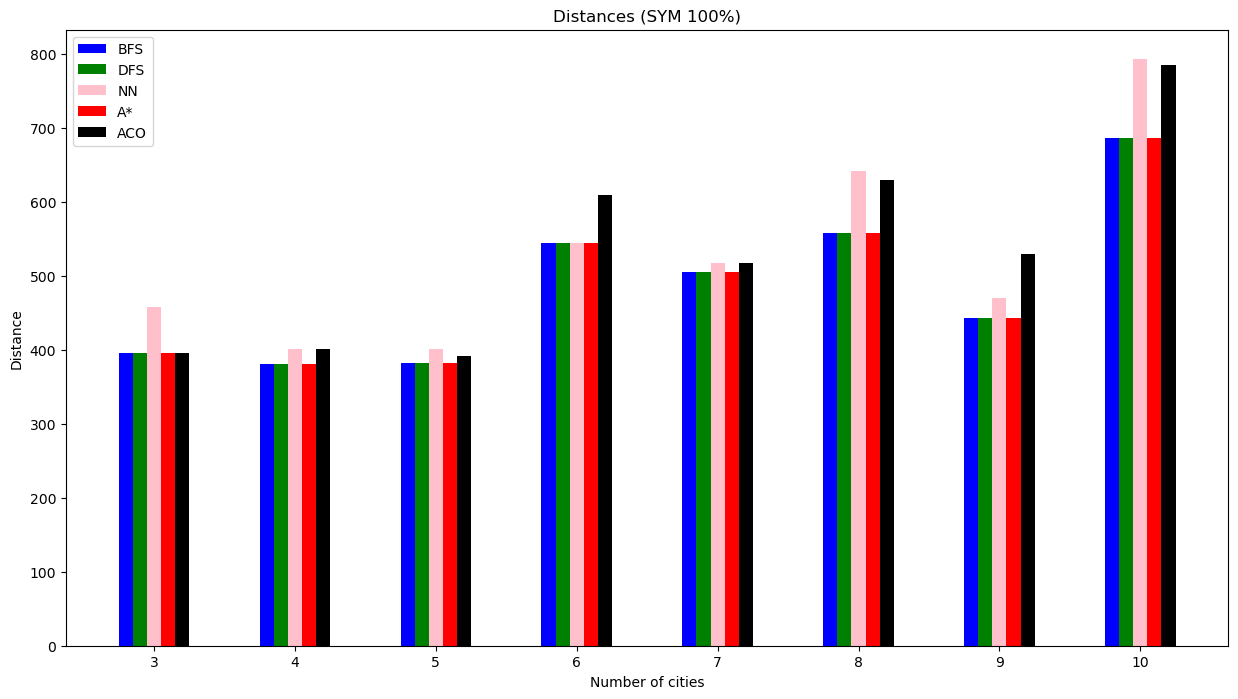

In [7]:
import matplotlib.pyplot as plt
x = np.arange(3, 11)
width = 0.1
_, ax = plt.subplots(figsize=(15,8))
ax.bar(x - width*2, distance_bfs, width=width, label='BFS', color='b')
ax.bar(x - width, distance_bfs, width=width, label='DFS', color='g')
ax.bar(x, distance_nn, width=width, label='NN', color='pink')
ax.bar(x + width, distance_astar, width=width, label='A*', color='r')
ax.bar(x + width*2, distance_aco, width=width, label='ACO', color='black')
ax.set_xlabel('Number of cities')
ax.set_ylabel('Distance')
ax.set_title('Distances (SYM 100%)')
ax.legend()

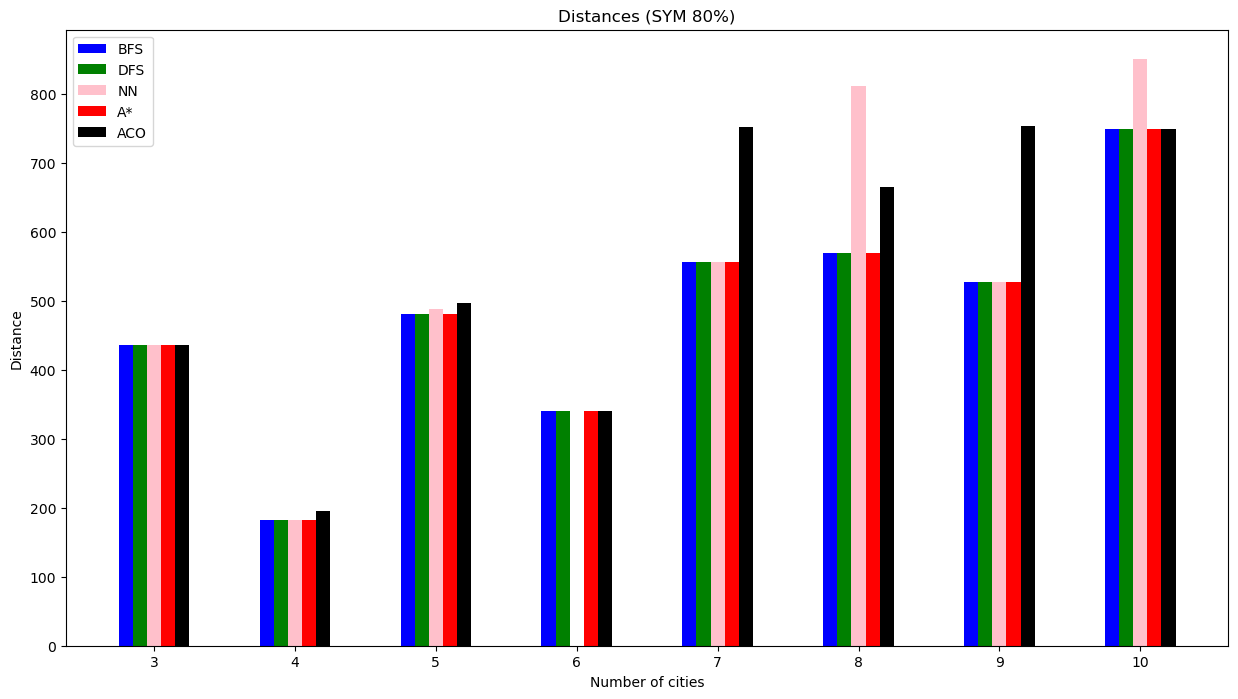

In [67]:
_, ax = plt.subplots(figsize=(15,8))
ax.bar(x - width*2, distance_bfs, width=width, label='BFS', color='b')
ax.bar(x - width, distance_bfs, width=width, label='DFS', color='g')
ax.bar(x, distance_nn, width=width, label='NN', color='pink')
ax.bar(x + width, distance_astar, width=width, label='A*', color='r')
ax.bar(x + width*2, distance_aco, width=width, label='ACO', color='black')
ax.set_xlabel('Number of cities')
ax.set_ylabel('Distance')
ax.set_title('Distances (SYM 80%)')
ax.legend()

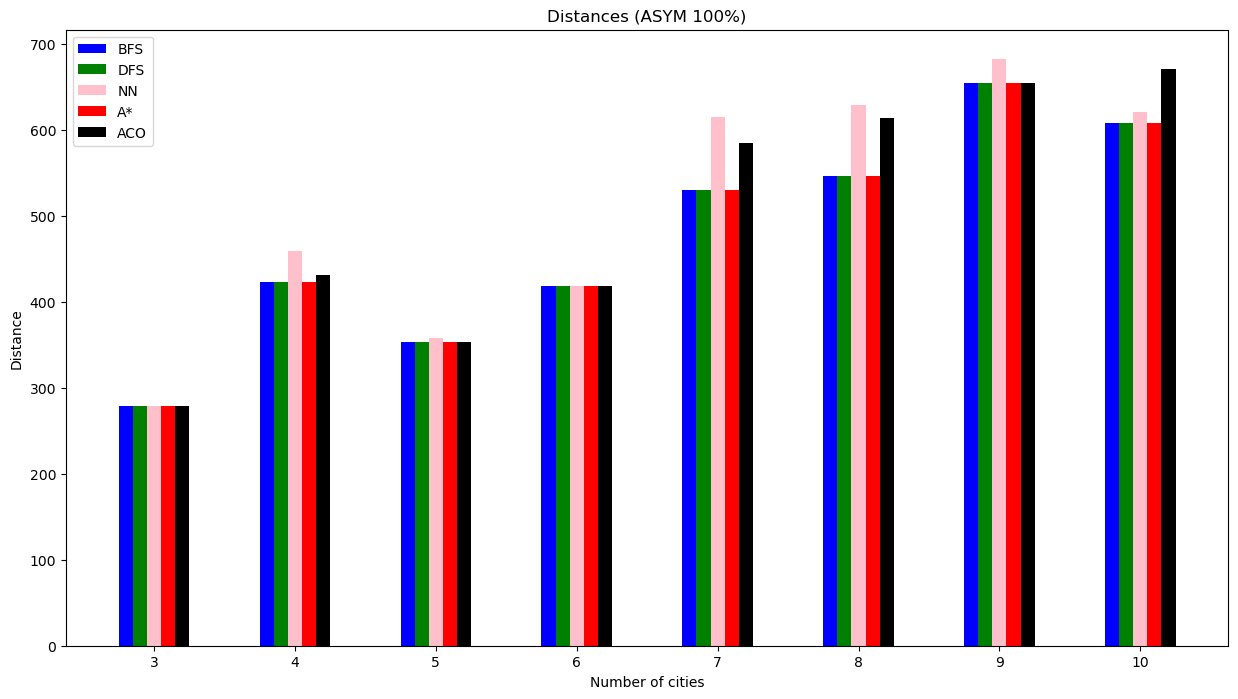

In [70]:
_, ax = plt.subplots(figsize=(15,8))
ax.bar(x - width*2, distance_bfs, width=width, label='BFS', color='b')
ax.bar(x - width, distance_bfs, width=width, label='DFS', color='g')
ax.bar(x, distance_nn, width=width, label='NN', color='pink')
ax.bar(x + width, distance_astar, width=width, label='A*', color='r')
ax.bar(x + width*2, distance_aco, width=width, label='ACO', color='black')
ax.set_xlabel('Number of cities')
ax.set_ylabel('Distance')
ax.set_title('Distances (ASYM 100%)')
ax.legend()

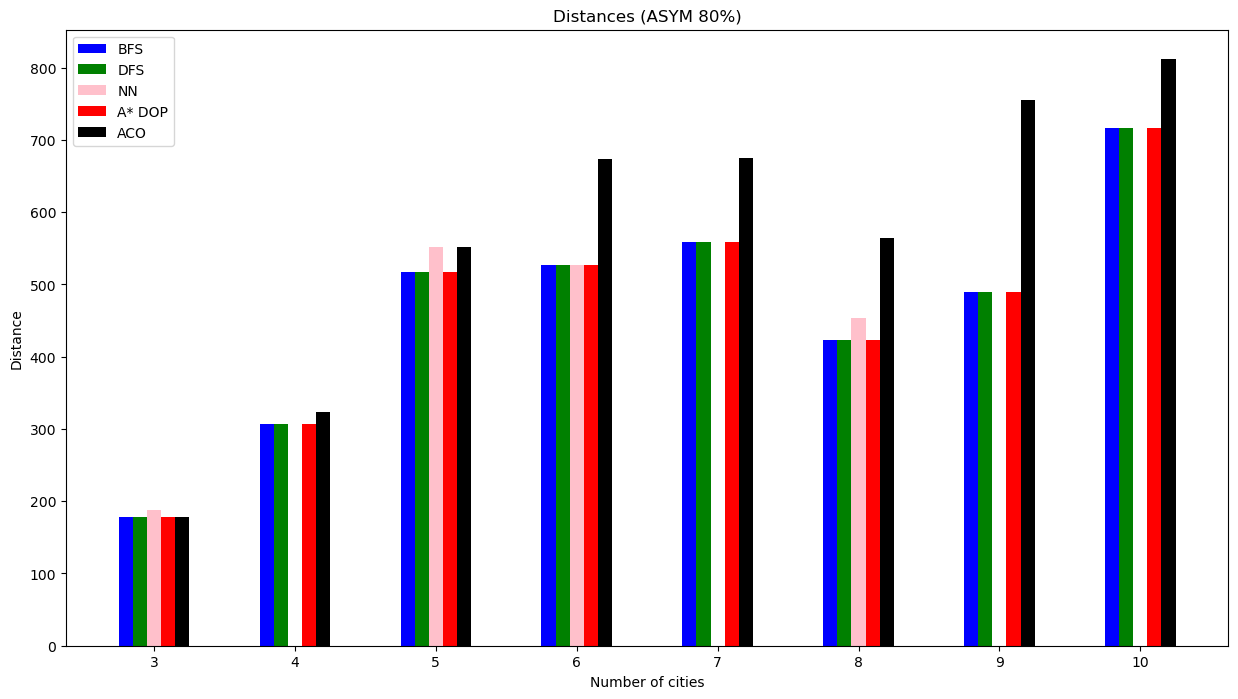

In [73]:
_, ax = plt.subplots(figsize=(15,8))
ax.bar(x - width*2, distance_bfs, width=width, label='BFS', color='b')
ax.bar(x - width, distance_bfs, width=width, label='DFS', color='g')
ax.bar(x, distance_nn, width=width, label='NN', color='pink')
ax.bar(x + width, distance_astar, width=width, label='A* DOP', color='r')
ax.bar(x + width*2, distance_aco, width=width, label='ACO', color='black')
ax.set_xlabel('Number of cities')
ax.set_ylabel('Distance')
ax.set_title('Distances (ASYM 80%)')
ax.legend()

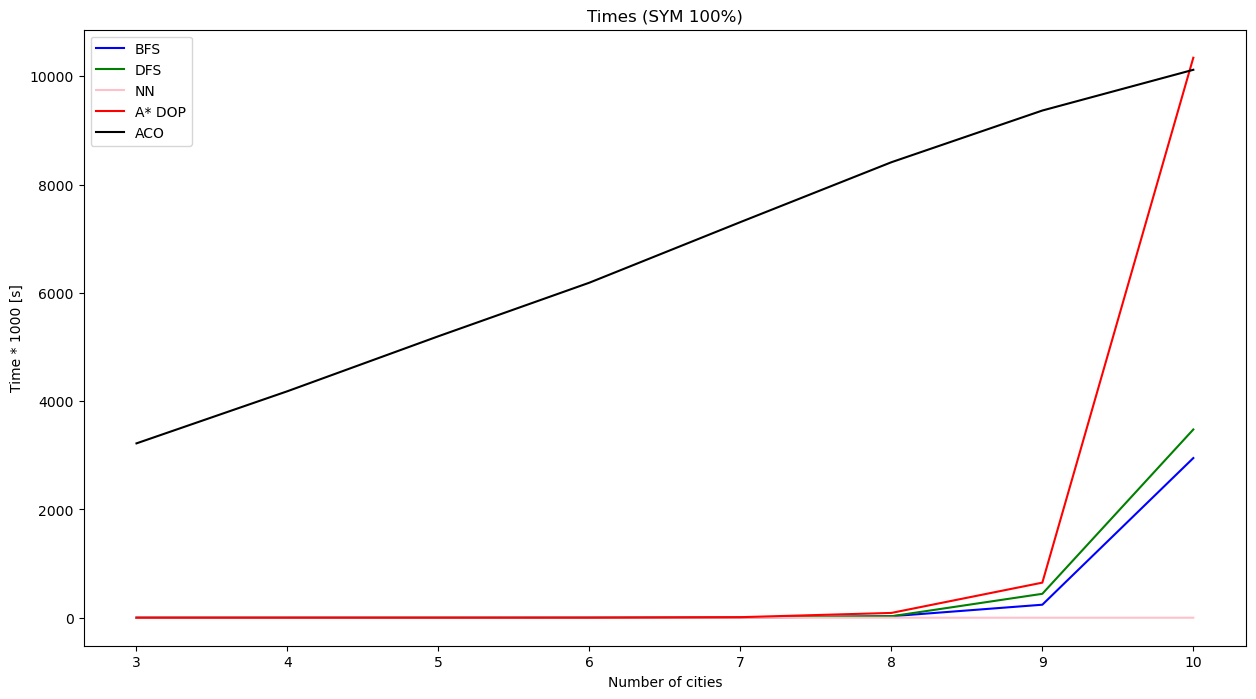

In [65]:
_, ax = plt.subplots(figsize=(15,8))
ax.plot(x, times_dfs, label='BFS', color='b')
ax.plot(x, times_bfs, label='DFS', color='g')
ax.plot(x, times_nn, label='NN', color='pink')
ax.plot(x, times_astar, label='A* DOP', color='r')
ax.plot(x, times_aco, label='ACO', color='black')
ax.set_xlabel('Number of cities')
ax.set_ylabel('Time * 1000 [s]')
ax.set_title('Times (SYM 100%)')
ax.legend()

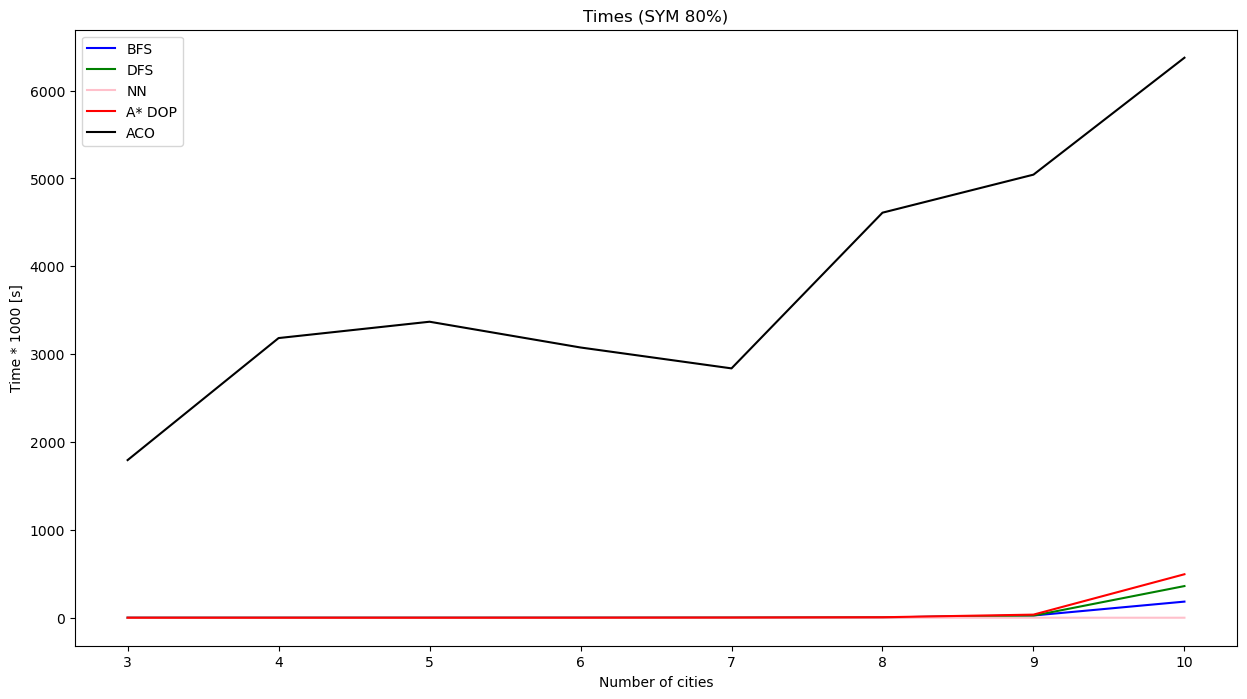

In [68]:
_, ax = plt.subplots(figsize=(15,8))
ax.plot(x, times_dfs, label='BFS', color='b')
ax.plot(x, times_bfs, label='DFS', color='g')
ax.plot(x, times_nn, label='NN', color='pink')
ax.plot(x, times_astar, label='A* DOP', color='r')
ax.plot(x, times_aco, label='ACO', color='black')
ax.set_xlabel('Number of cities')
ax.set_ylabel('Time * 1000 [s]')
ax.set_title('Times (SYM 80%)')
ax.legend()

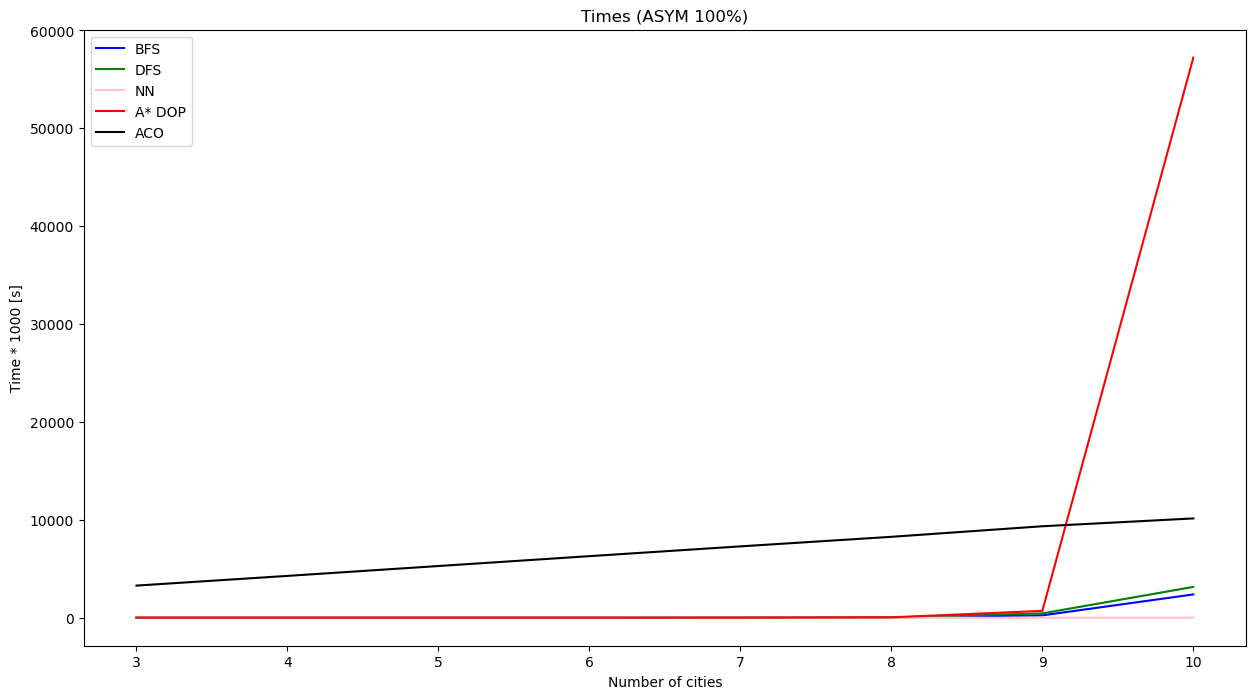

In [71]:
_, ax = plt.subplots(figsize=(15,8))
ax.plot(x, times_dfs, label='BFS', color='b')
ax.plot(x, times_bfs, label='DFS', color='g')
ax.plot(x, times_nn, label='NN', color='pink')
ax.plot(x, times_astar, label='A* DOP', color='r')
ax.plot(x, times_aco, label='ACO', color='black')
ax.set_xlabel('Number of cities')
ax.set_ylabel('Time * 1000 [s]')
ax.set_title('Times (ASYM 100%)')
ax.legend()

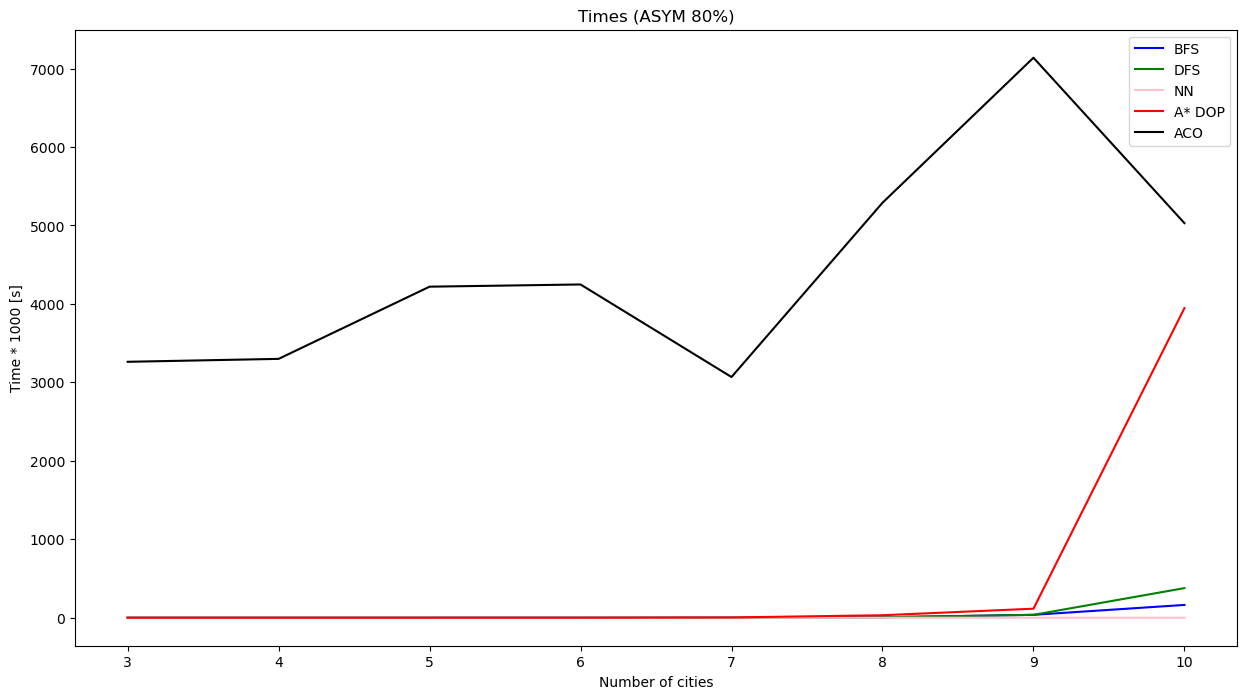

In [74]:
_, ax = plt.subplots(figsize=(15,8))
ax.plot(x, times_dfs, label='BFS', color='b')
ax.plot(x, times_bfs, label='DFS', color='g')
ax.plot(x, times_nn, label='NN', color='pink')
ax.plot(x, times_astar, label='A* DOP', color='r')
ax.plot(x, times_aco, label='ACO', color='black')
ax.set_xlabel('Number of cities')
ax.set_ylabel('Time * 1000 [s]')
ax.set_title('Times (ASYM 80%)')
ax.legend()

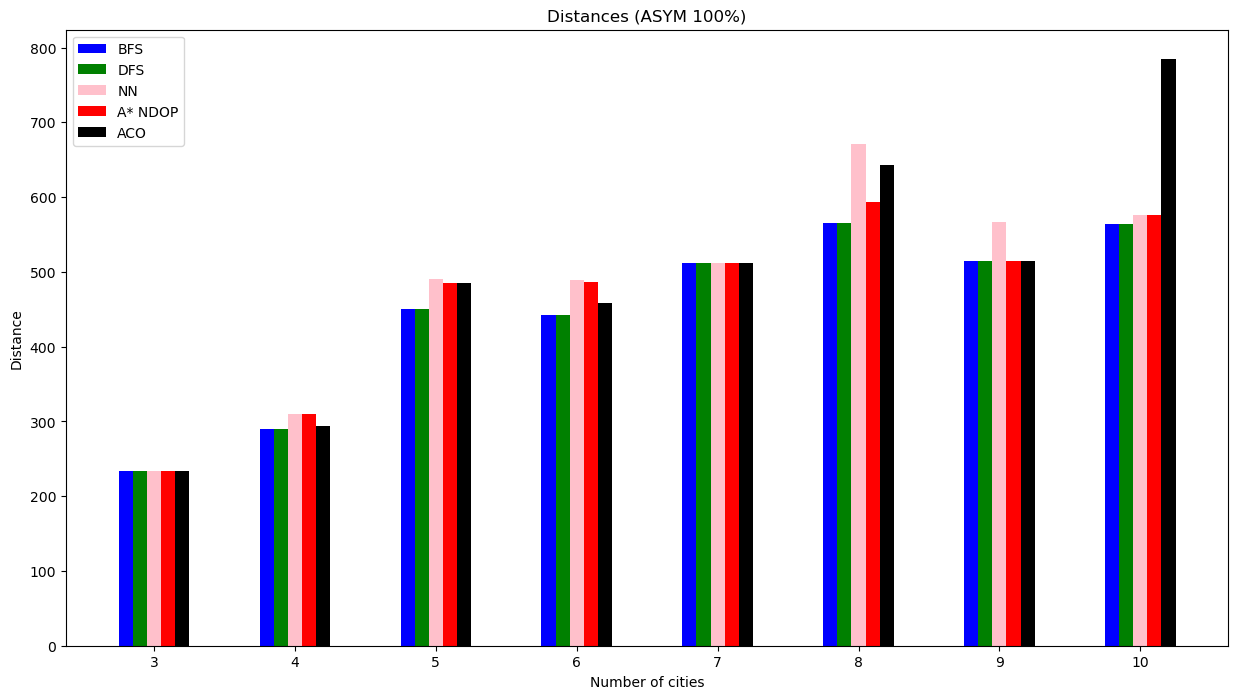

In [78]:
_, ax = plt.subplots(figsize=(15,8))
ax.bar(x - width*2, distance_bfs, width=width, label='BFS', color='b')
ax.bar(x - width, distance_bfs, width=width, label='DFS', color='g')
ax.bar(x, distance_nn, width=width, label='NN', color='pink')
ax.bar(x + width, distance_astar, width=width, label='A* NDOP', color='r')
ax.bar(x + width*2, distance_aco, width=width, label='ACO', color='black')
ax.set_xlabel('Number of cities')
ax.set_ylabel('Distance')
ax.set_title('Distances (ASYM 100%)')
ax.legend()

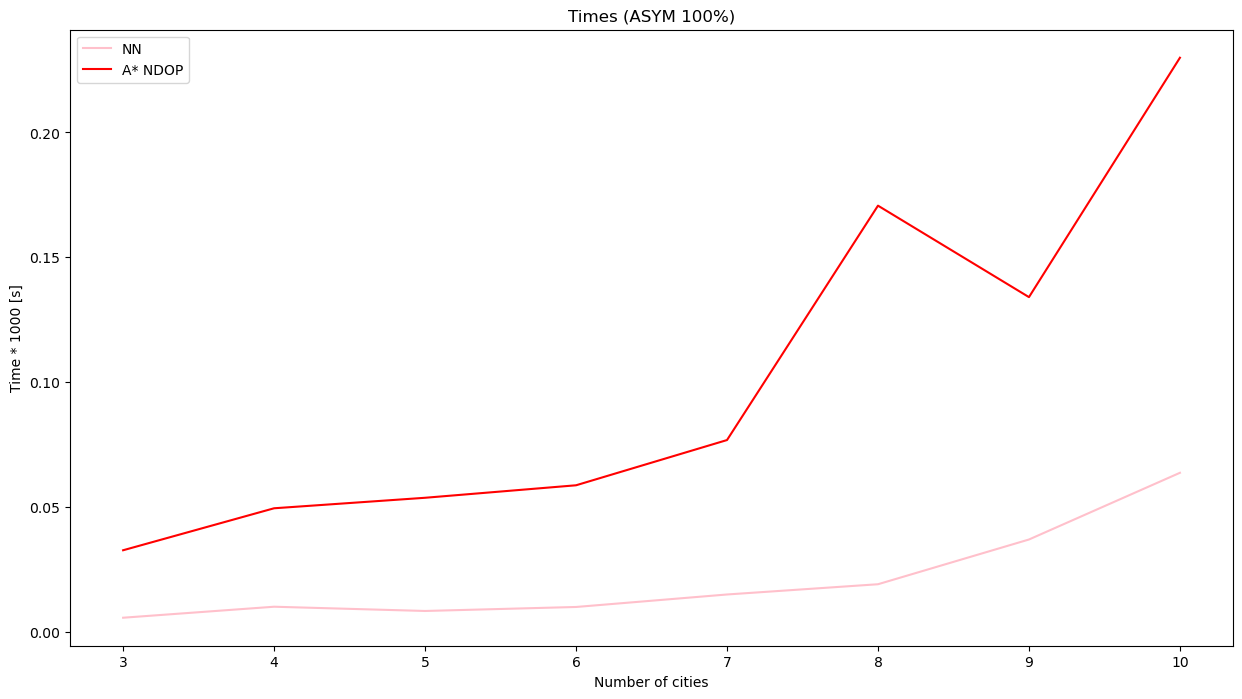

In [80]:
_, ax = plt.subplots(figsize=(15,8))
# ax.plot(x, times_dfs, label='BFS', color='b')
# ax.plot(x, times_bfs, label='DFS', color='g')
ax.plot(x, times_nn, label='NN', color='pink')
ax.plot(x, times_astar, label='A* NDOP', color='r')
# ax.plot(x, times_aco, label='ACO', color='black')
ax.set_xlabel('Number of cities')
ax.set_ylabel('Time * 1000 [s]')
ax.set_title('Times (ASYM 100%)')
ax.legend()